In [12]:
#prepare the program
from classiq import *
from classiq.execution import ExecutionPreferences

@qfunc
def main(exp_value: Output[QBit]) -> None:
    allocate(1, exp_value)
    target = QArray("target")
    allocate(4,target)  
    within_apply(lambda:H(exp_value),lambda:control(exp_value,lambda:qft(target)))

In [24]:
#excute the program
shot_list =[1000,2000,4000,8000,16000]
pro_zero_qbit_lists = []
expect_value_lists = []
for i in shot_list:
    qmod = create_model(main)
    qmod = set_execution_preferences(qmod, execution_preferences=ExecutionPreferences(num_shots=i,random_seed=767))
    qprog = synthesize(qmod)
    res = execute(qprog).result()[0].value

    #probility of |0>
    pro_zero_qbit = res.counts["0"]/i   
    pro_zero_qbit_lists.append(pro_zero_qbit)

    #Equation expection value of |0>
    expect_value =(2 * res.counts["0"] / i) - 1
    expect_value_lists.append(expect_value)


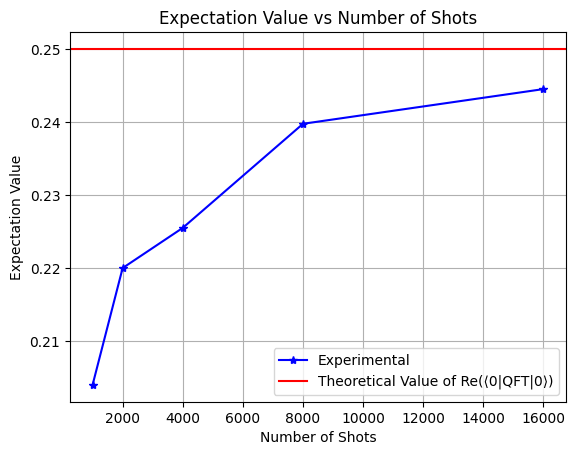

In [25]:
import matplotlib.pyplot as plt
#As theoretical value of <0|UQFT|0> = 0.25
theoretical_value  = 0.25


# Title for the plot (optional)
plt.title('Expectation Value vs Number of Shots')

# Labels for the plot
plt.xlabel("Number of Shots")
plt.ylabel('Expectation Value')


plt.plot(shot_list, expect_value_lists, marker='*',linestyle='-', color='b', label='Experimental')

plt.axhline(y=theoretical_value, color='r', linestyle='-', label='Theoretical Value of Re(⟨0|QFT|0⟩)')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [ ]:
#According the grap even theoretical value of <0|UQFT|0> is 0.25 and
#Most of the time randamly Experimental of Expectation Value can be consider varying
#But Expectation Value tend to closing to Theoretical Value 
#when we try try excute program mutiple time with different shots 
#As the more we excute we can see Expectation Value closer to  heoretical value


In [28]:
import numpy as np

shot_list =[1000,2000,4000,8000,16000,20000]
experienntal_result={}
for j in range(5):
    pro_zero_lists = []
    theo_value_lists = []
    for i in shot_list:
        qmod = create_model(main)
        qmod = set_execution_preferences(qmod, execution_preferences=ExecutionPreferences(num_shots=i))
        qprog = synthesize(qmod)
        res = execute(qprog).result()[0].value
        
        pro_zero = res.counts["0"]/i
        pro_zero_lists.append(pro_zero)
        theo_value =(2 * res.counts["0"] / i) - 1
        theo_value_lists.append(theo_value)
    experienntal_result.update({j:theo_value_lists})

In [44]:
experienntal_result

{0: [0.21799999999999997,
  0.23399999999999999,
  0.24649999999999994,
  0.22924999999999995,
  0.24075000000000002,
  0.2587999999999999],
 1: [0.236,
  0.2450000000000001,
  0.2569999999999999,
  0.252,
  0.236375,
  0.26170000000000004],
 2: [0.254,
  0.2250000000000001,
  0.25350000000000006,
  0.256,
  0.25187500000000007,
  0.238],
 3: [0.244,
  0.256,
  0.25449999999999995,
  0.24550000000000005,
  0.252375,
  0.25639999999999996],
 4: [0.28600000000000003,
  0.28800000000000003,
  0.23399999999999999,
  0.25675000000000003,
  0.24287499999999995,
  0.24530000000000007]}

[0.2587999999999999, 0.26170000000000004, 0.256, 0.25639999999999996, 0.28800000000000003]
[0.236, 0.2450000000000001, 0.2569999999999999, 0.252, 0.236375, 0.26170000000000004]


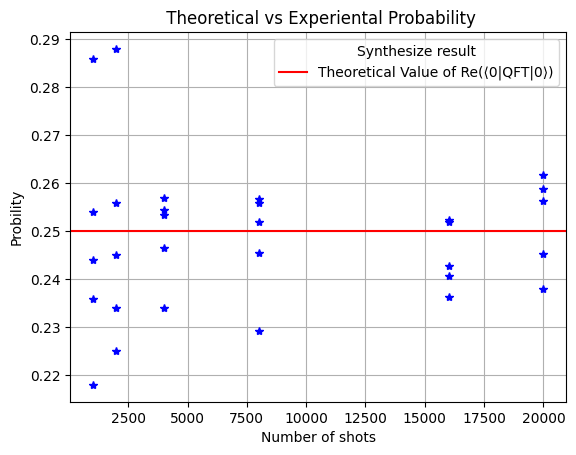

In [63]:
import matplotlib.pyplot as plt
#As theoretical value of <0|UQFT|0> = 0.25
theoretical_value  = 0.25

max_data =[]
mini_data =[]
for i in range(len(shot_list)-1):
    max_data.append(max(experienntal_result[i]))
    mini_data.append(min(experienntal_result[i]))
print(max_data)

print(experienntal_result[1])
for i in range(len(shot_list)-1): 
    plt.plot(shot_list,experienntal_result[i],marker='*',linestyle='',color='b')
    

# plt.plot(shot_list,max_data,marker='*',linestyle='dotted',label="" )
# plt.axhline(y=max_data,linestyle='dotted',color='b' , label=f"{i} Mix result")
# plt.axhline(y=mini_data,linestyle='dotted',color='b' , label=f"{i} Min result")
plt.axhline(y=theoretical_value, color='r', linestyle='-', label='Theoretical Value of Re(⟨0|QFT|0⟩)')
# Add legend
plt.legend()
plt.legend().set_title("Synthesize result")
# Title for the plot (optional)
plt.title(" Theoretical vs Experiental Probability")
# Labels for the plot
plt.xlabel("Number of shots")
plt.ylabel("Probility")
# Show the plot
plt.grid(True)
plt.show()